In [150]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [151]:
df=pd.read_csv("housing_prices.csv") 
df

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement,city,country
0,3.130000e+05,3.0,1.50,1340.0,1.5,0.0,0.0,1340.0,0.0,Shoreline,USA
1,2.384000e+06,5.0,2.50,3650.0,2.0,0.0,4.0,3370.0,280.0,Seattle,USA
2,3.420000e+05,3.0,2.00,1930.0,1.0,0.0,0.0,1930.0,0.0,Kent,USA
3,4.200000e+05,3.0,2.25,2000.0,1.0,0.0,0.0,1000.0,1000.0,Bellevue,USA
4,5.500000e+05,4.0,2.50,1940.0,1.0,0.0,0.0,1140.0,800.0,Redmond,USA
...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510.0,1.0,0.0,0.0,1510.0,0.0,Seattle,USA
4596,5.343333e+05,3.0,2.50,1460.0,2.0,0.0,0.0,1460.0,0.0,Bellevue,USA
4597,4.169042e+05,3.0,2.50,3010.0,2.0,0.0,0.0,3010.0,0.0,Renton,USA
4598,2.034000e+05,4.0,2.00,2090.0,1.0,0.0,0.0,1070.0,1020.0,Seattle,USA


In [152]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement
count,4.599000e+03,4599.000000,4594.000000,4566.000000,4589.000000,4587.000000,4594.000000,4593.000000,4598.000000
mean,5.520482e+05,3.400957,2.161515,2139.495401,1.512421,0.007194,0.240966,1828.236664,312.080252
std,5.638664e+05,0.908928,0.783815,964.974586,0.538369,0.084522,0.778864,862.420345,464.191681
min,0.000000e+00,0.000000,0.000000,370.000000,1.000000,0.000000,0.000000,370.000000,0.000000
25%,3.234167e+05,3.000000,1.750000,1460.000000,1.000000,0.000000,0.000000,1190.000000,0.000000
50%,4.610000e+05,3.000000,2.250000,1970.000000,1.500000,0.000000,0.000000,1590.000000,0.000000
75%,6.549750e+05,4.000000,2.500000,2620.000000,2.000000,0.000000,0.000000,2300.000000,610.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,3.500000,1.000000,4.000000,9410.000000,4820.000000


In [153]:
df.isnull().sum()

price             1
bedrooms          1
bathrooms         6
sqft_living      34
floors           11
waterfront       13
view              6
sqft_above        7
sqft_basement     2
city              0
country           0
dtype: int64

In [154]:
df["sqft_living"]=df["sqft_living"].fillna(np.mean(df["sqft_living"]))
df.isnull().sum()

price             1
bedrooms          1
bathrooms         6
sqft_living       0
floors           11
waterfront       13
view              6
sqft_above        7
sqft_basement     2
city              0
country           0
dtype: int64

In [155]:
df.dropna(inplace=True)
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
floors           0
waterfront       0
view             0
sqft_above       0
sqft_basement    0
city             0
country          0
dtype: int64

In [156]:
x=df.drop(["price", "city", "country"], axis= 1)
y=df["price"]

<Axes: xlabel='price', ylabel='Count'>

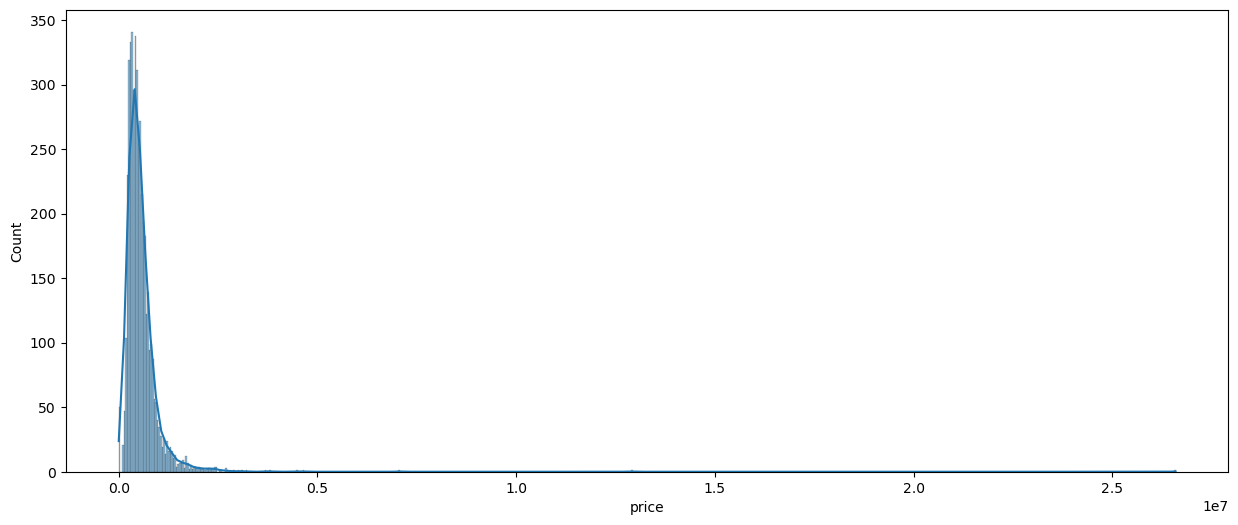

In [157]:
plt.figure(figsize=((15,6)))
sns.histplot(df["price"],kde=True)

delete ,drop outliers for price

<Axes: xlabel='price', ylabel='Count'>

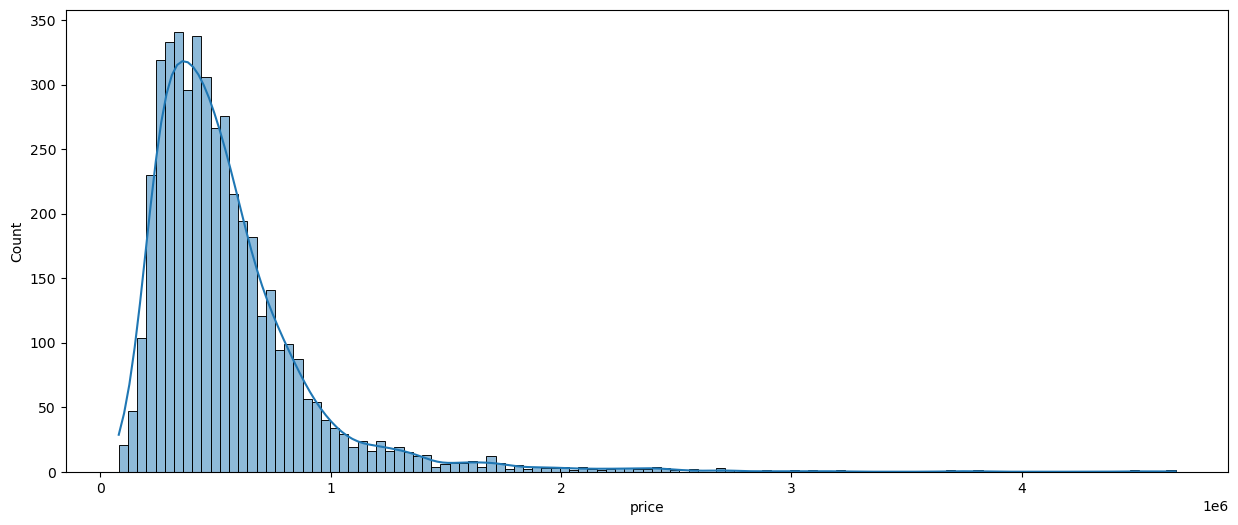

In [158]:
df=df[df["price"]< 0.5 * 1e7]
df=df[df["price"]> 4 * 1e4]
plt.figure(figsize=((15,6)))
sns.histplot(df["price"],kde=True)

In [159]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement
count,4.501000e+03,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000
mean,5.489349e+05,3.396579,2.156798,2133.665819,1.513775,0.006443,0.233504,1823.621640,310.127749
std,3.561518e+05,0.905184,0.776427,948.733835,0.537721,0.080018,0.764720,852.063147,461.543285
min,8.000000e+04,0.000000,0.000000,370.000000,1.000000,0.000000,0.000000,370.000000,0.000000
25%,3.265000e+05,3.000000,1.750000,1470.000000,1.000000,0.000000,0.000000,1190.000000,0.000000
50%,4.650000e+05,3.000000,2.250000,1980.000000,1.500000,0.000000,0.000000,1590.000000,0.000000
75%,6.580000e+05,4.000000,2.500000,2610.000000,2.000000,0.000000,0.000000,2300.000000,600.000000
max,4.668000e+06,9.000000,8.000000,13540.000000,3.500000,1.000000,4.000000,9410.000000,4820.000000


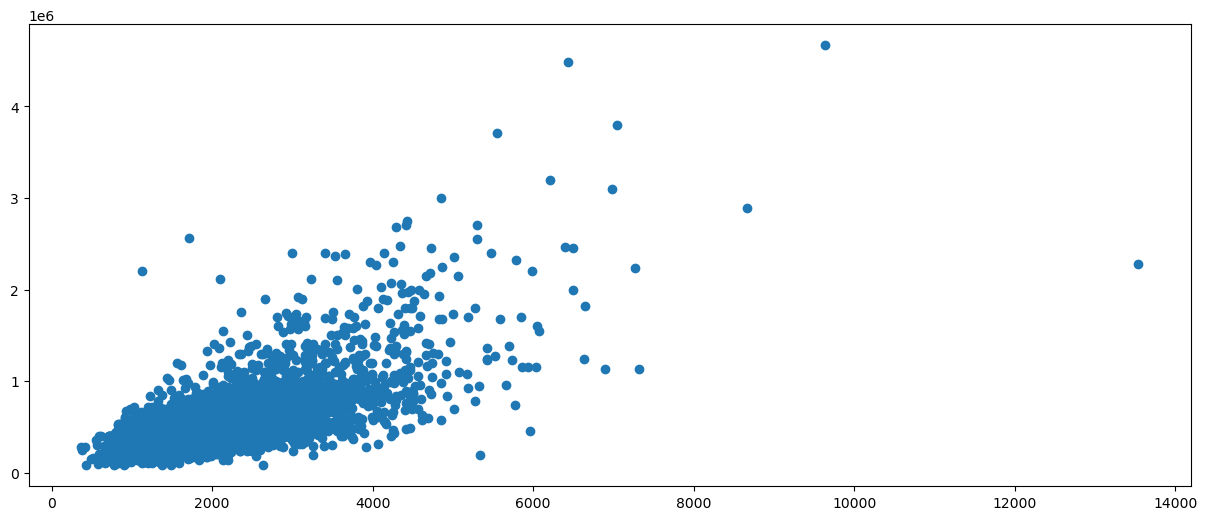

In [160]:
plt.figure(figsize=((15,6)))
plt.scatter(x=df["sqft_living"],y=df["price"])

In [161]:
df["sqft_living"]=df["sqft_living"]

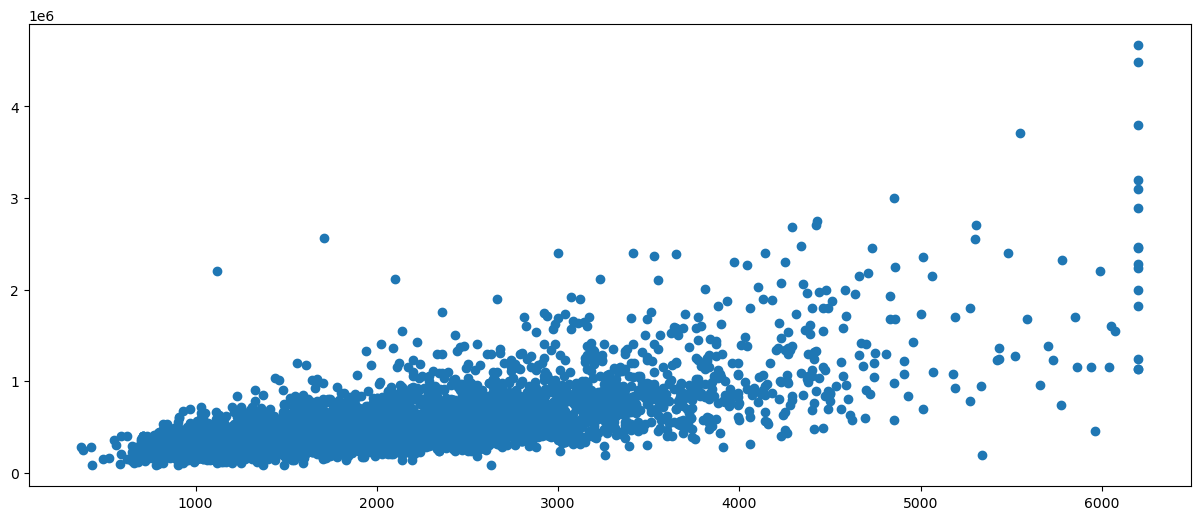

In [162]:
df["sqft_living"]=np.where(df["sqft_living"]<6200,df["sqft_living"],6200)
plt.figure(figsize=((15,6)))
plt.scatter(x=df["sqft_living"],y=df["price"])

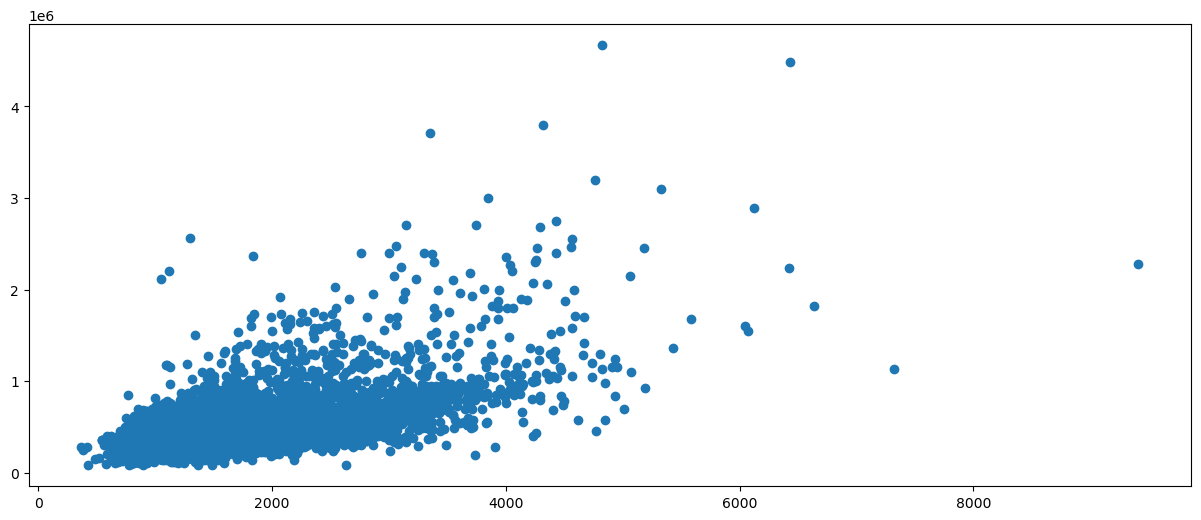

In [163]:
plt.figure(figsize=(15,6))
plt.scatter(x=df["sqft_above"],y=df["price"])

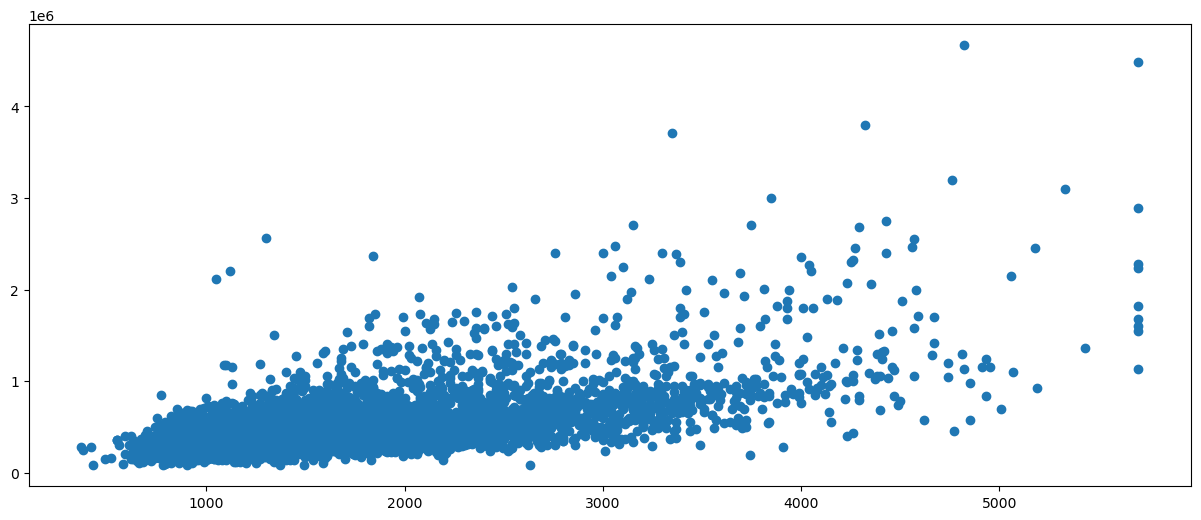

In [164]:
df["sqft_above"]=np.where(df["sqft_above"]<5500,df["sqft_above"],5700)
plt.figure(figsize=(15,6))
plt.scatter(x=df["sqft_above"],y=df["price"])

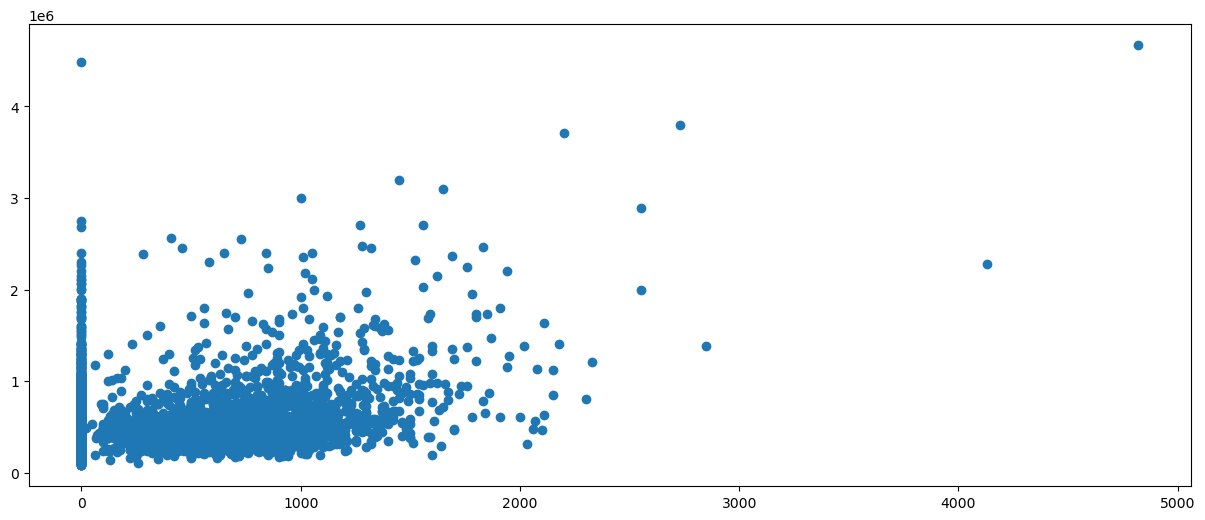

In [165]:
plt.figure(figsize=(15,6))
plt.scatter(x=df["sqft_basement"],y=df["price"])

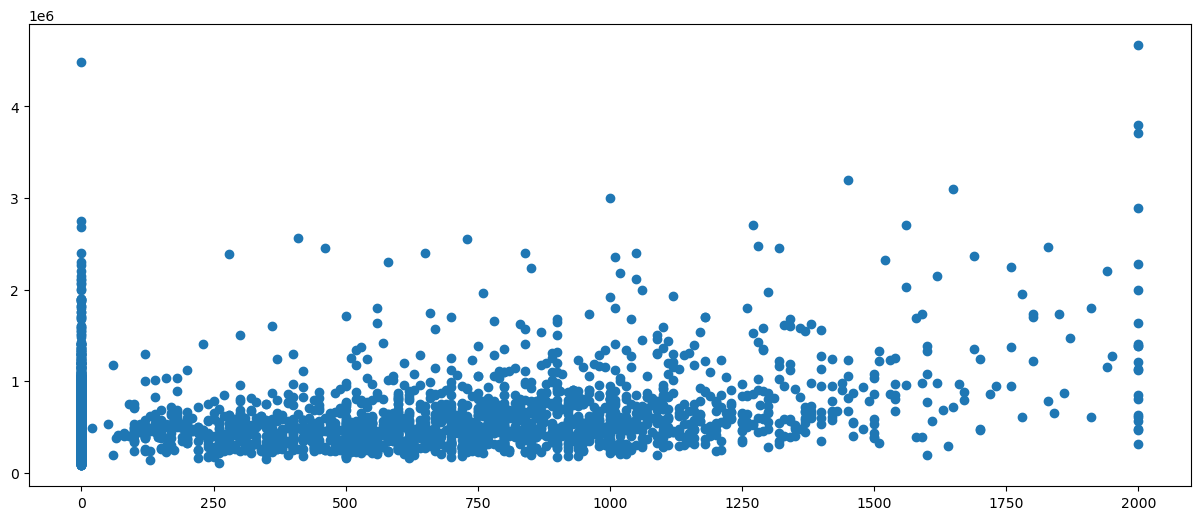

In [166]:
df["sqft_basement"]=np.where(df["sqft_basement"]<2000,df["sqft_basement"],2000)
plt.figure(figsize=(15,6))
plt.scatter(x=df["sqft_basement"],y=df["price"])

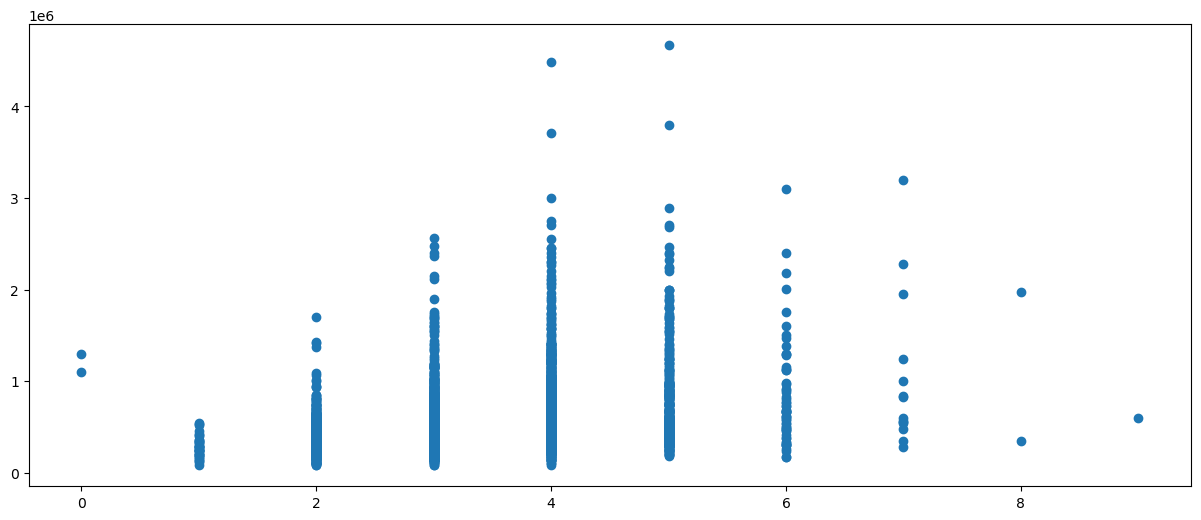

In [167]:
plt.figure(figsize=(15,6))
plt.scatter(x=df["bedrooms"],y=df["price"])

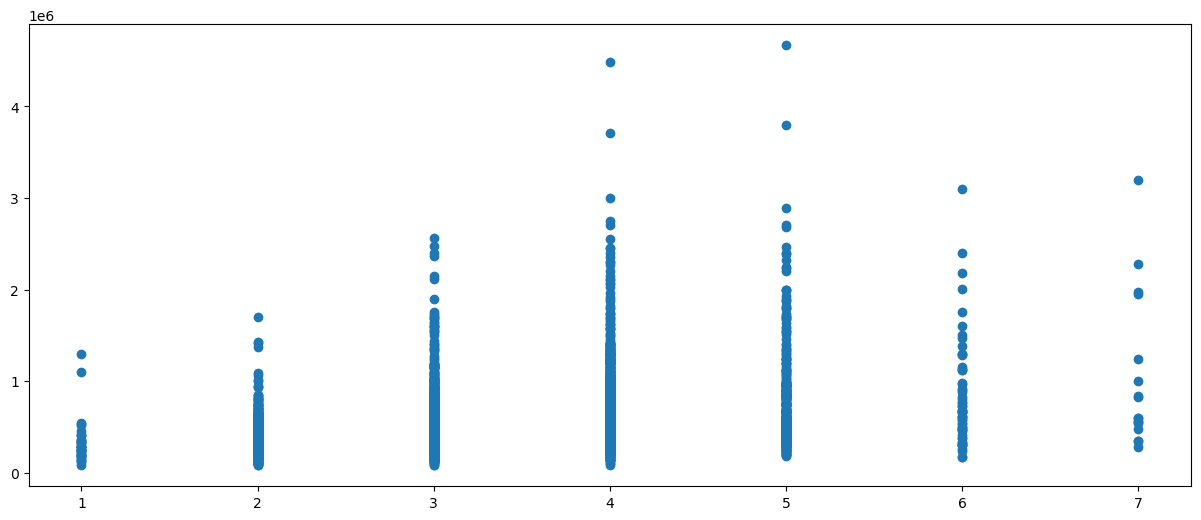

In [168]:
df["bedrooms"]=np.where(df["bedrooms"]>1,df["bedrooms"],1)
df["bedrooms"]=np.where(df["bedrooms"]<7,df["bedrooms"],7)
plt.figure(figsize=(15,6))
plt.scatter(x=df["bedrooms"],y=df["price"])

<Axes: xlabel='bedrooms', ylabel='price'>

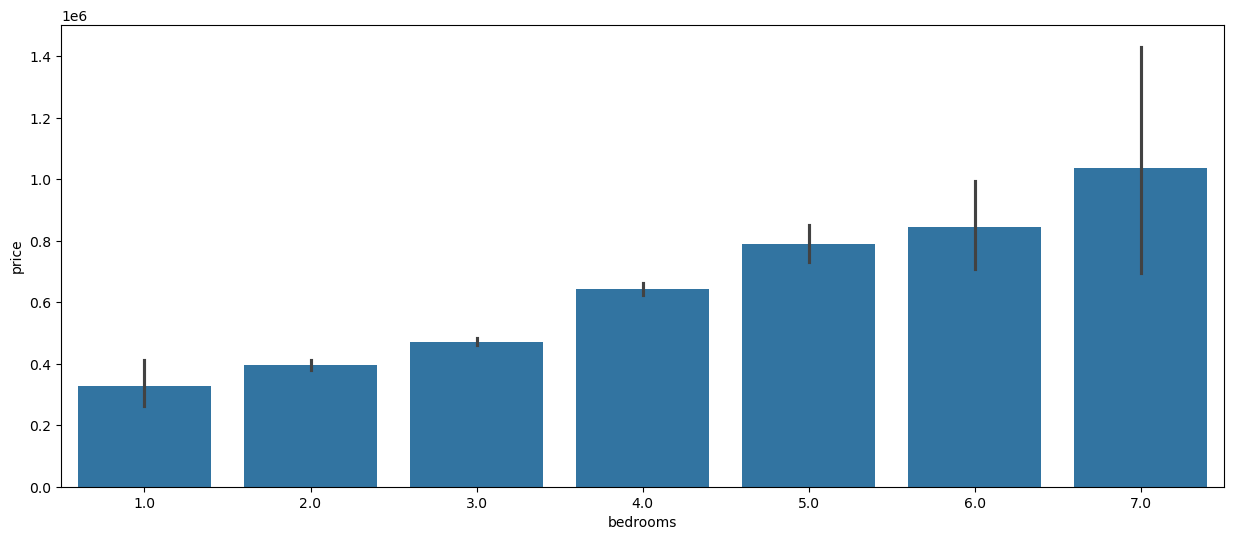

In [169]:
plt.figure(figsize=(15,6))
sns.barplot(x=df["bedrooms"],y=df["price"])

In [170]:
(df==0).sum()

price               0
bedrooms            0
bathrooms           2
sqft_living         0
floors              0
waterfront       4472
view             4061
sqft_above          0
sqft_basement    2688
city                0
country             0
dtype: int64

In [171]:
df=df[df["bathrooms"]!=0]

In [172]:
(df==0).sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
floors              0
waterfront       4470
view             4060
sqft_above          0
sqft_basement    2686
city                0
country             0
dtype: int64

<Axes: xlabel='bathrooms', ylabel='price'>

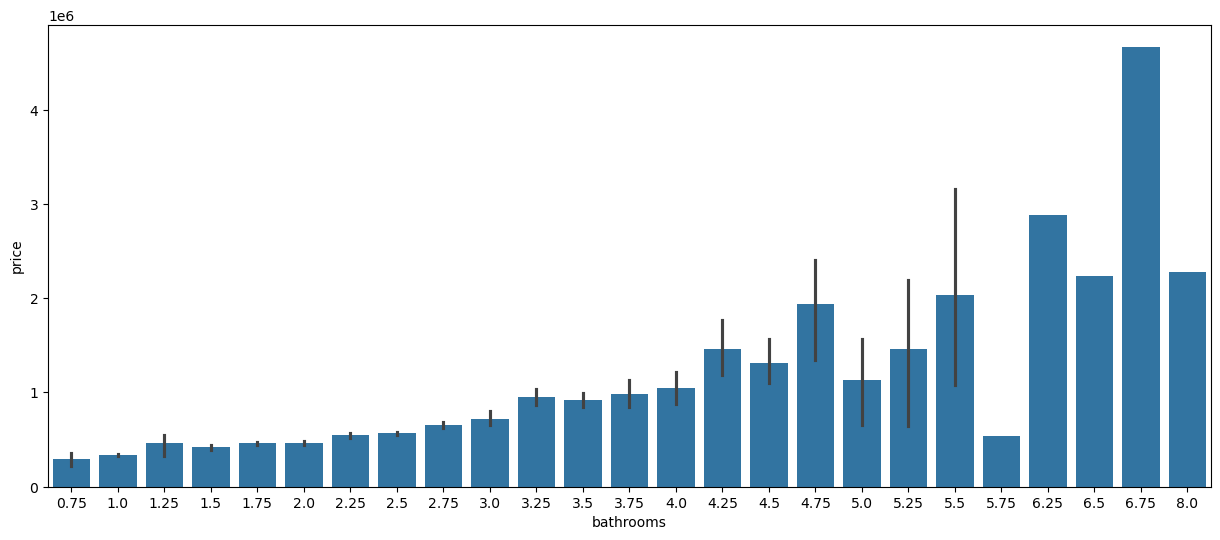

In [173]:
plt.figure(figsize=(15,6))
sns.barplot(x=df["bathrooms"],y=df["price"])

In [174]:
df["bathrooms"].value_counts().sort_index()

bathrooms
0.75      17
1.00     725
1.25       3
1.50     283
1.75     619
2.00     422
2.25     407
2.50    1173
2.75     269
3.00     162
3.25     134
3.50     158
3.75      34
4.00      21
4.25      22
4.50      25
4.75       7
5.00       5
5.25       4
5.50       4
5.75       1
6.25       1
6.50       1
6.75       1
8.00       1
Name: count, dtype: int64

<Axes: xlabel='bathrooms', ylabel='price'>

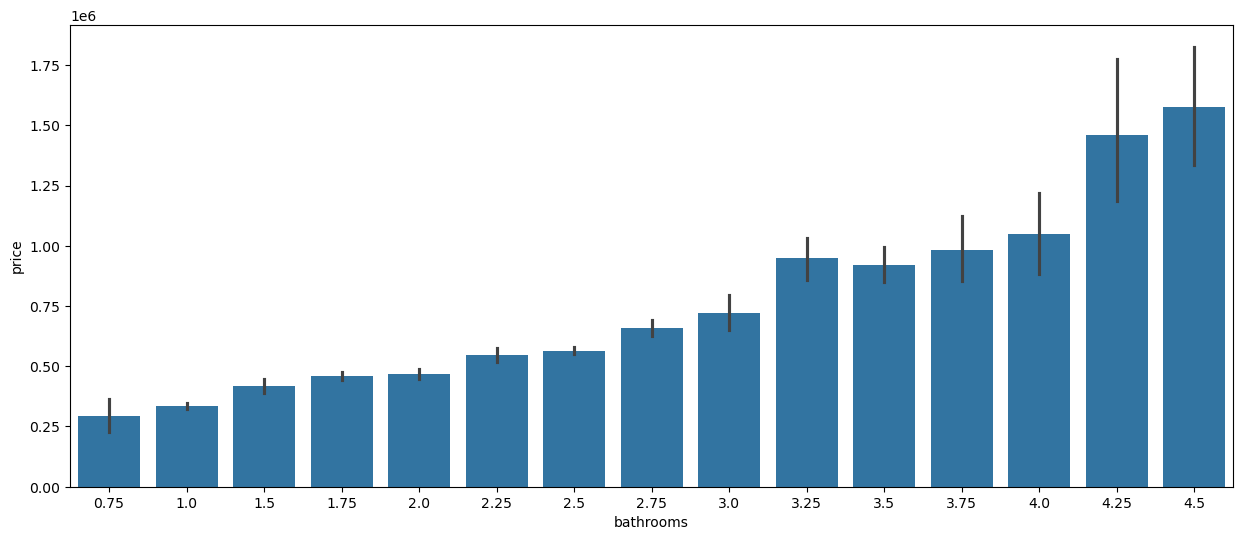

In [175]:
df["bathrooms"]=np.where(df["bathrooms"]<4.5,df["bathrooms"],4.5)
df["bathrooms"]=np.where(df["bathrooms"]==1.25,1,df["bathrooms"])
plt.figure(figsize=(15,6))
sns.barplot(x=df["bathrooms"],y=df["price"])

<Axes: xlabel='floors', ylabel='price'>

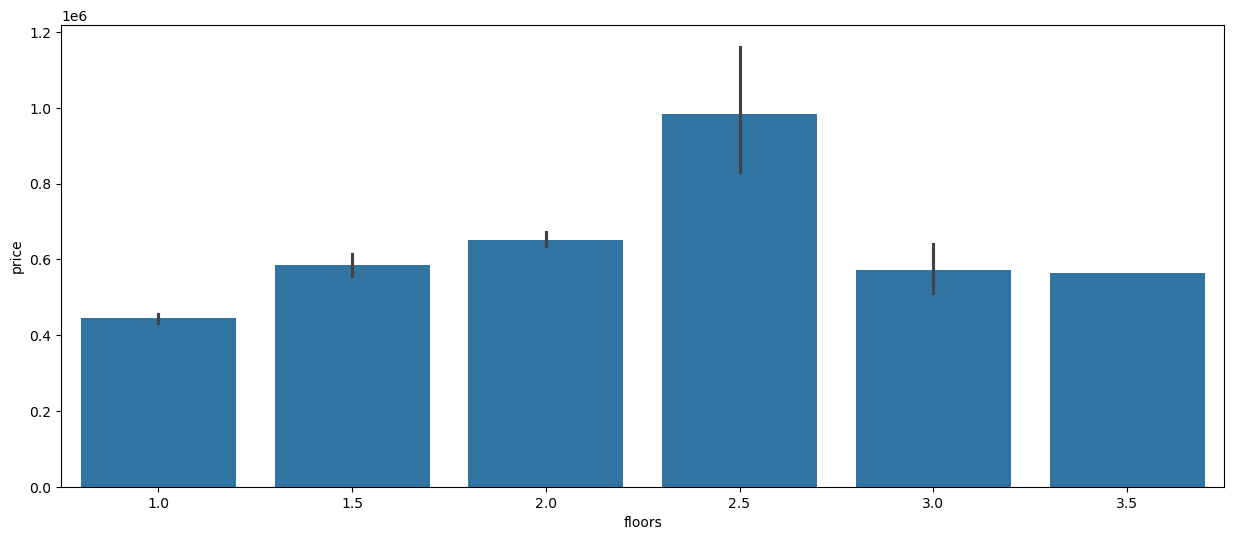

In [176]:
plt.figure(figsize=(15,6))
sns.barplot(x=df["floors"],y=df["price"])

<Axes: xlabel='floors', ylabel='price'>

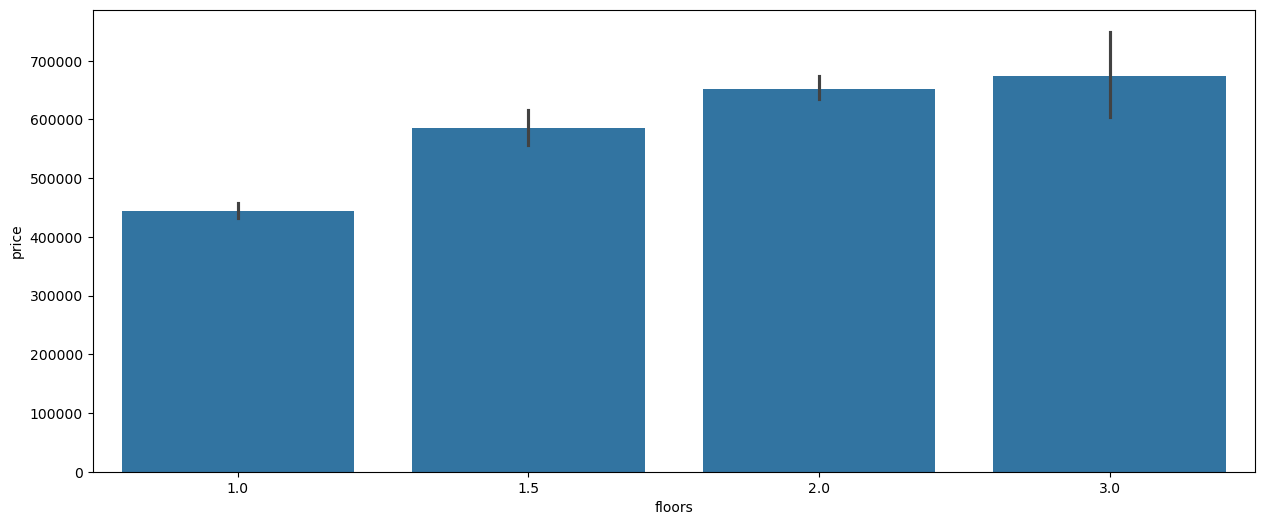

In [177]:
df["floors"]=np.where(df["floors"]==3.5,3,df["floors"])
df["floors"]=np.where(df["floors"]==2.5,3,df["floors"])
plt.figure(figsize=(15,6))
sns.barplot(x=df["floors"],y=df["price"])

<Axes: xlabel='view', ylabel='price'>

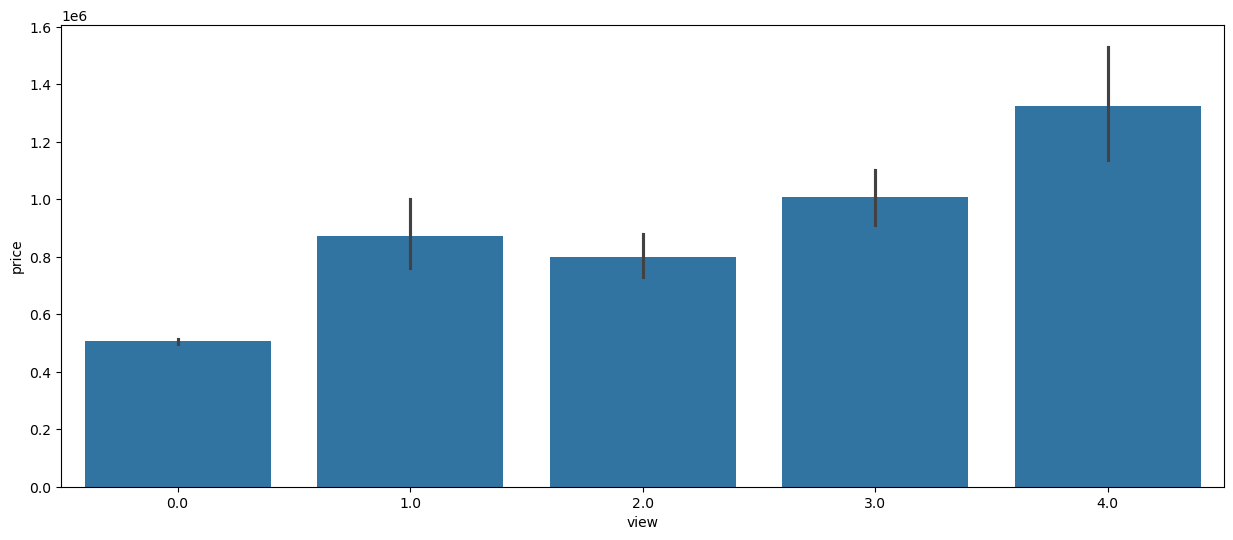

In [178]:
plt.figure(figsize=(15,6))
sns.barplot(x=df["view"],y=df["price"])

In [181]:
x = df.drop(["price", "city", "country"], axis= 1)
y = df["price"]

In [182]:
model=LinearRegression()
model.fit(x,y)
z=model.score(x,y)
z

0.5231793450122

In [188]:
x = df.drop(["price"], axis= 1)
x=pd.get_dummies(data=x,columns=["country","city"])
y = df["price"]


In [189]:
model=LinearRegression()
model.fit(x,y)
z1=model.score(x,y)
z1

0.6930249607465376